# ***Graph Neural Networks for End-to-End Particle Identification with the CMS Experiment***
### *written by Khalid Bagus Pratama Darmadi, S.Si (Khalid); Papua, Indonesia*
*for ML4SCI on Google Summer of Code 2023*

Common Task 1. Electron/photon classification
Datasets:

> https://cernbox.cern.ch/index.php/s/AtBT8y4MiQYFcgc (photons)
> https://cernbox.cern.ch/index.php/s/FbXw3V4XNyYB3oA (electrons)


Description: 32x32 matrices (two channels - hit energy and time) for two classes of
particles electrons and photons impinging on a calorimeter

Please use a deep learning method of your choice to achieve the highest possible
classification on this dataset (we ask that you do it both in Keras/Tensorflow and in
PyTorch). Please provide a Jupyter notebook that shows your solution. The model you submit should have a ROC AUC score of at least 0.80.

**Solution: (PyTorch)**

For this task, here is the model description for classifying whether the output would be an electron or a photon. The data will be preprocessed with normalization and quantization to 8-bits.

This model combine custom layers and EfficientNetB2 for purpose of effectively learn and classify the features of electrons and photons impinging on a calorimeter. The residual block, channel reduction, and EfficientNetB2 suppose to help the model learn complex features, while the dense layers, dropout, and global average pooling enable it to perform the final classification.

1. Input and concatenation layer

> The input layer accepts a tensor of shape (2, 32, 32), which corresponds to the hit energy and time data. A 1x1 convolution layer is used to expand the input data from 2 channels to 3 channels, making it compatible with the EfficientNetB2 model. The GELU activation function is applied after the convolution.

2. Residual block layer

> The model incorporates a residual block that consists of three convolutional layers. The first Conv2D layer has 6 output channels, while the second Conv2D layer applies depthwise convolution with 6 input channels and 6 output channels. The last Conv2D layer has 3 output channels. GELU activation functions and batch normalization layers are used after each convolution operation. The output of the residual block is added back to the original input. This design allows the model to learn complex patterns and feature representations while reducing the risk of vanishing gradients. The GELU activation function improves the model's learning capabilities compared to more traditional activation functions like ReLU.

3. EfficientNetB2 layer 

> This is a state-of-the-art convolutional neural network architecture that has been optimized for better performance and smaller model size. By incorporating EfficientNetB2 into the model, it can effectively learn more complex and abstract features from the input data, leading to better classification performance. The EfficientNetB2 model is pretrained on the ImageNet dataset, which means it already has a good understanding of general features, and this can help in faster convergence and better performance in the specific task of electron/photon classification.

4. Classifier

> The classifier consists of two dense layers and a dropout layer. The first dense layer has 256 units and a GELU activation function to learn a higher-level representation of the input features. The dropout layer with a rate of 0.5 helps prevent overfitting by randomly setting a fraction of the input units to 0 during training. The final dense layer with one unit and a sigmoid activation function produces a probability value between 0 and 1, representing the likelihood of the input belonging to the positive class (either electron or photon, depending on how the labels are assigned).

In [ ]:
import h5py
import pandas as pd
import numpy as np

electron_file = h5py.File('/content/drive/MyDrive/GSoC/task_1/SingleElectronPt50_IMGCROPS_n249k_RHv1.hdf5')
photon_file = h5py.File('/content/drive/MyDrive/GSoC/task_1/SinglePhotonPt50_IMGCROPS_n249k_RHv1.hdf5')

print("Keys in electron_file:")
print(list(electron_file.keys()))

print("\nKeys in photon_file:")
print(list(photon_file.keys()))

Keys in electron_file:
['X', 'y']

Keys in photon_file:
['X', 'y']


In [ ]:
# If the files have a nested structure, we can explore it further like this:

print("\nStructure of electron_file:")
def print_structure(name, obj):
    print(f"{name}: {type(obj)}")
    
electron_file.visititems(print_structure)

print("\nStructure of photon_file:")
photon_file.visititems(print_structure)


Structure of electron_file:
X: <class 'h5py._hl.dataset.Dataset'>
y: <class 'h5py._hl.dataset.Dataset'>

Structure of photon_file:
X: <class 'h5py._hl.dataset.Dataset'>
y: <class 'h5py._hl.dataset.Dataset'>


In [ ]:
# Load the data and labels

electron_X = electron_file['X']
electron_y = electron_file['y']
photon_X = photon_file['X']
photon_y = photon_file['y']

In [ ]:
# Inspect the shapes

print("Shapes:")
print(f"Electron data (X): {electron_X.shape}")
print(f"Electron labels (y): {electron_y.shape}")
print(f"Photon data (X): {photon_X.shape}")
print(f"Photon labels (y): {photon_y.shape}")

Shapes:
Electron data (X): (249000, 32, 32, 2)
Electron labels (y): (249000,)
Photon data (X): (249000, 32, 32, 2)
Photon labels (y): (249000,)


In [ ]:
# Print the first few samples and labels

print("\nFirst 5 samples and labels for electrons:")
for i in range(5):
    print(f"Sample {i}:")
    print(electron_X[i])
    print(f"Label {i}: {electron_y[i]}")

print("\nFirst 5 samples and labels for photons:")
for i in range(5):
    print(f"Sample {i}:")
    print(photon_X[i])
    print(f"Label {i}: {photon_y[i]}")


First 5 samples and labels for electrons:
Sample 0:
[[[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 ...

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]]
Label 0: 1.0
Sample 1:
[[[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 ...

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]]
Label 1: 1.0
Sample 2:
[[[0. 0.]
  [0. 0.]
  [0. 0.]
  ...
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0.

Electron data statistics:
Hit Energy Channel:
  Min: 0.0
  Max: 1.4318130016326904
  Mean: 0.001215839758515358
  Std: 0.022602548822760582

Hit Time Channel:
  Min: -2.512557029724121
  Max: 2.275660276412964
  Mean: -0.0002865783462766558
  Std: 0.06925680488348007

Photon data statistics:
Hit Energy Channel:
  Min: 0.0
  Max: 1.4849443435668945
  Mean: 0.0012234959285706282
  Std: 0.02478918246924877

Hit Time Channel:
  Min: -2.512557029724121
  Max: 2.2779698371887207
  Mean: -0.00023703569604549557
  Std: 0.06545672565698624
Electron data statistics:
Hit Energy Channel:
  Min: 0.0
  Max: 1.4318130016326904
  Mean: 0.001215839758515358
  Std: 0.022602548822760582

Hit Time Channel:
  Min: -2.512557029724121
  Max: 2.275660276412964
  Mean: -0.0002865783462766558
  Std: 0.06925680488348007

Photon data statistics:
Hit Energy Channel:
  Min: 0.0
  Max: 1.4849443435668945
  Mean: 0.0012234959285706282
  Std: 0.02478918246924877

Hit Time Channel:
  Min: -2.512557029724121
  Max: 2.27

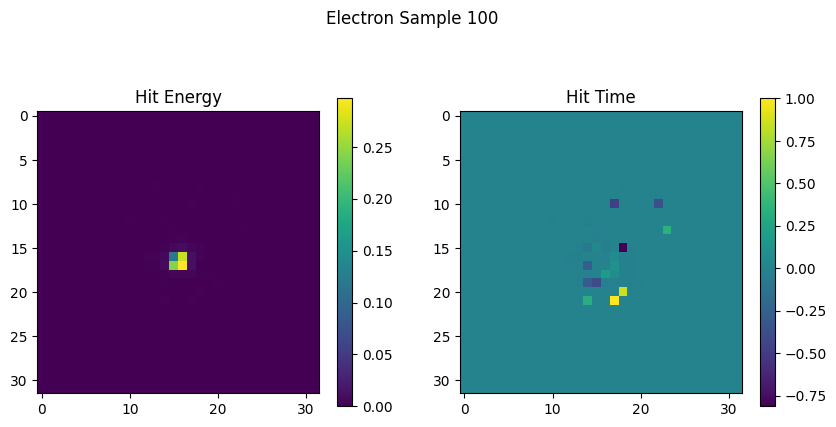

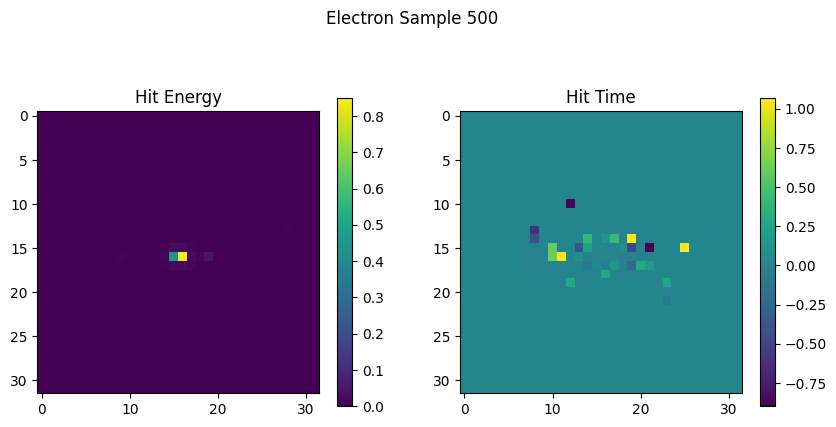

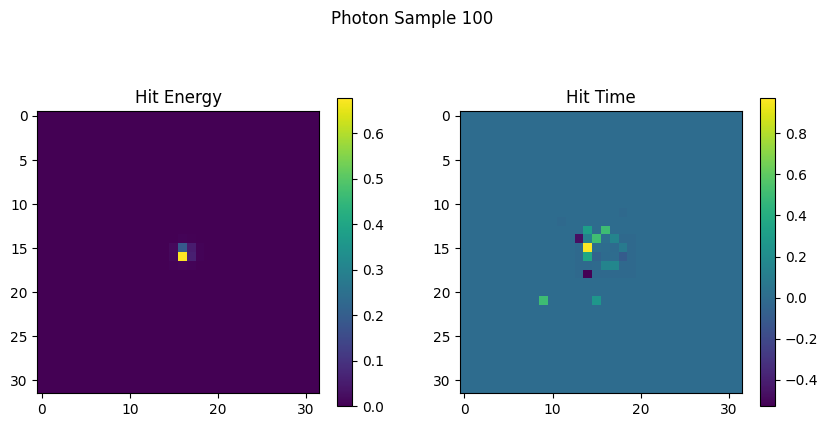

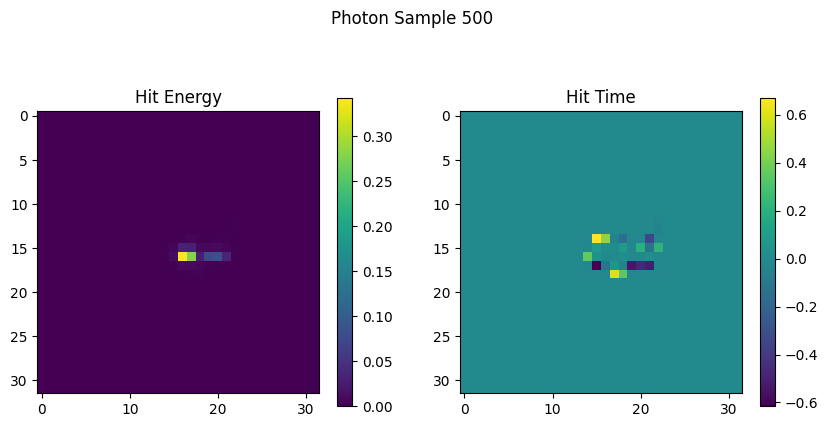

In [ ]:
import matplotlib.pyplot as plt

electron_X_np = np.array(electron_X)
photon_X_np = np.array(photon_X)

def display_statistics(data):
    energy_data = data[:, :, :, 0]
    time_data = data[:, :, :, 1]
    
    print("Hit Energy Channel:")
    print(f"  Min: {energy_data.min()}")
    print(f"  Max: {energy_data.max()}")
    print(f"  Mean: {energy_data.mean()}")
    print(f"  Std: {energy_data.std()}")
    
    print("\nHit Time Channel:")
    print(f"  Min: {time_data.min()}")
    print(f"  Max: {time_data.max()}")
    print(f"  Mean: {time_data.mean()}")
    print(f"  Std: {time_data.std()}")

print("Electron data statistics:")
display_statistics(electron_X_np)
print("\nPhoton data statistics:")
display_statistics(photon_X_np)

print("Electron data statistics:")
display_statistics(electron_X_np)
print("\nPhoton data statistics:")
display_statistics(photon_X_np)

def plot_sample(sample, title):
    energy = sample[:, :, 0]
    time = sample[:, :, 1]

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    im1 = axs[0].imshow(sample[:, :, 0], cmap='viridis')
    axs[0].imshow(energy, cmap='viridis')
    cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.8)
    axs[0].set_title('Hit Energy')
    im2 = axs[1].imshow(sample[:, :, 1], cmap='viridis')
    axs[1].imshow(time, cmap='viridis')
    cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.8)
    axs[1].set_title('Hit Time')
    plt.suptitle(title)
    plt.show()

# Visualize a few samples from electron and photon datasets
plot_sample(electron_X_np[100], 'Electron Sample 100')
plot_sample(electron_X_np[500], 'Electron Sample 500')
plot_sample(photon_X_np[100], 'Photon Sample 100')
plot_sample(photon_X_np[500], 'Photon Sample 500')


In [ ]:
# Combine electron and photon data and labels

X = np.concatenate((electron_X, photon_X), axis=0)
y = np.concatenate((electron_y, photon_y), axis=0)

In [ ]:
# Normalize the data
# Assuming X is a 4D array (samples, width, height, channels)

X_normalized = X / X.max(axis=(0, 1, 2), keepdims=True)

In [ ]:
# Apply quantization

n_bits = 8
X_quantized = np.round(X_normalized * (2**n_bits - 1)).astype(np.uint8)


In [ ]:
# Split the data into training and validation sets

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_quantized, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Create stratified batches for training and validation data

from sklearn.model_selection import StratifiedShuffleSplit

batch_size = 8300  # Adjust this based on the desired batch size
sss = StratifiedShuffleSplit(n_splits=1, test_size=batch_size, random_state=42)

def create_stratified_batches(X_data, y_data, batch_size):
    n_splits = int(np.ceil(len(X_data) / batch_size))
    sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=batch_size, random_state=42)
    batches = []

    for train_index, test_index in sss.split(X_data, y_data):
        X_batch, y_batch = X_data[test_index], y_data[test_index]
        batches.append((X_batch, y_batch))
    
    return batches

train_batches = create_stratified_batches(X_train, y_train, batch_size)
val_batches = create_stratified_batches(X_val, y_val, batch_size)

In [ ]:
# Save stratified batches into Parquet files

import pickle

def save_batches(batches, prefix):
    for i, (batch_data, batch_labels) in enumerate(batches):
        # Save data and labels as binary data
        with open(f'{prefix}_batch_{i}_data.pkl', 'wb') as data_file:
            pickle.dump(batch_data, data_file)
        with open(f'{prefix}_batch_{i}_labels.pkl', 'wb') as labels_file:
            pickle.dump(batch_labels, labels_file)

save_batches(train_batches, '/content/drive/MyDrive/GSoC/task_1/prcsd_training/training')
save_batches(val_batches, '/content/drive/MyDrive/GSoC/task_1/prcsd_val/validation')


Batch      Electron   Photon    
0          4150       4150      
1          4150       4150      
2          4150       4150      
3          4150       4150      
4          4150       4150      
5          4150       4150      
6          4150       4150      
7          4150       4150      
8          4150       4150      
9          4150       4150      
Hit Energy Channel:
  Min: 0
  Max: 246
  Mean: 0.20384012612951807
  Std: 4.064403768854381

Hit Time Channel:
  Min: 0
  Max: 255
  Mean: 9.92738234186747
  Std: 47.70885034491328


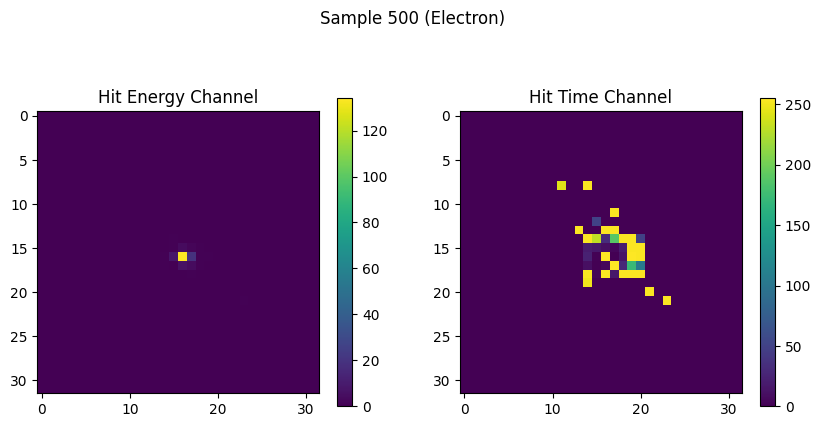

In [ ]:
import pickle
import matplotlib.pyplot as plt

def display_statistics(data):
    energy_data = data[:, :, :, 0]
    time_data = data[:, :, :, 1]
    
    print("Hit Energy Channel:")
    print(f"  Min: {energy_data.min()}")
    print(f"  Max: {energy_data.max()}")
    print(f"  Mean: {energy_data.mean()}")
    print(f"  Std: {energy_data.std()}")
    
    print("\nHit Time Channel:")
    print(f"  Min: {time_data.min()}")
    print(f"  Max: {time_data.max()}")
    print(f"  Mean: {time_data.mean()}")
    print(f"  Std: {time_data.std()}")

# Load data and labels from a .pkl file
def load_batch_data(prefix, batch_index):
    with open(f'{prefix}_batch_{batch_index}_data.pkl', 'rb') as data_file:
        batch_data = pickle.load(data_file)
    with open(f'{prefix}_batch_{batch_index}_labels.pkl', 'rb') as labels_file:
        batch_labels = pickle.load(labels_file)
    
    n_electron = sum(batch_labels == 1)
    n_photon = sum(batch_labels == 0)
    
    return batch_data, batch_labels, n_electron, n_photon

# Display label counts for each batch
prefix = '/content/drive/MyDrive/GSoC/task_1/prcsd_training/training'
n_batches = 10

print(f"{'Batch':<10} {'Electron':<10} {'Photon':<10}")
for i in range(n_batches):
    _, _, n_electron, n_photon = load_batch_data(prefix, i)
    print(f"{i:<10} {n_electron:<10} {n_photon:<10}")

# Load the first batch of training data
batch_data, batch_labels, _, _ = load_batch_data(prefix, 0)

# Display statistics
display_statistics(batch_data)

# Plot the data (first sample)
sample_index = 500
sample = batch_data[sample_index]
label = batch_labels[sample_index]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
im1 = ax[0].imshow(sample[:, :, 0], cmap='viridis')
ax[0].set_title("Hit Energy Channel")
cbar1 = plt.colorbar(im1, ax=ax[0], shrink=0.8)
im2 = ax[1].imshow(sample[:, :, 1], cmap='viridis')
ax[1].set_title("Hit Time Channel")
cbar2 = plt.colorbar(im2, ax=ax[1], shrink=0.8)
plt.suptitle(f"Sample {sample_index} ({'Electron' if label == 1 else 'Photon'})")
plt.show()



In [ ]:
!pip install -q tensorflow
!pip install -q tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.6 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import efficientnet_b2
from torch.optim.lr_scheduler import CosineAnnealingLR

# Create the hybrid model
class HybridModel(nn.Module):
    def __init__(self, input_shape):
        super(HybridModel, self).__init__()

        # Reshape the input data to have 3 channels
        self.concat = nn.Sequential(
            nn.Conv2d(2, 3, 1),
            nn.GELU()
        )

        # Residual block
        self.res_block = nn.Sequential(
            nn.Conv2d(3, 6, 3, padding=1),
            nn.GELU(),
            nn.BatchNorm2d(6),
            nn.Conv2d(6, 6, 3, padding=1, groups=6),
            nn.GELU(),
            nn.BatchNorm2d(6),
            nn.Conv2d(6, 3, 1),
            nn.GELU()
        )

        # EfficientNet
        self.efficientnet = efficientnet_b2(pretrained=True)

        # Classifier
        self.classifier = nn.Sequential(
            nn.Linear(1000, 256),
            nn.GELU(),
            nn.Dropout(0.5),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.concat(x)
        x_res = self.res_block(x)
        x = x + x_res
        x = self.efficientnet(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)

        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Instantiate the model
input_shape = (2, 32, 32)
model = HybridModel(input_shape)
model = model.to(device)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B2_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b2_rwightman-bcdf34b7.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b2_rwightman-bcdf34b7.pth
100%|██████████| 35.2M/35.2M [00:00<00:00, 68.9MB/s]


In [ ]:
import os
import pickle
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.utils.data import DataLoader, Dataset


# Load data and labels from pkl files
def load_batch_data(prefix, batch_index):
    with open(f'{prefix}_batch_{batch_index}_data.pkl', 'rb') as data_file:
        batch_data = pickle.load(data_file)
    with open(f'{prefix}_batch_{batch_index}_labels.pkl', 'rb') as labels_file:
        batch_labels = pickle.load(labels_file)

    return batch_data, batch_labels


class CustomDataset(Dataset):
    def __init__(self, prefix, num_batches):
        self.data = []
        self.labels = []

        for i in range(num_batches):
            X, y = load_batch_data(prefix, i)
            X = torch.tensor(X, dtype=torch.float32).permute(0, 3, 1, 2)  # Permute dimensions
            self.data.append(X)
            self.labels.append(torch.tensor(y, dtype=torch.float32))

        self.data = torch.cat(self.data, dim=0)
        self.labels = torch.cat(self.labels, dim=0)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]


# Set parameters
train_prefix = '/content/drive/MyDrive/GSoC/task_1/prcsd_training/training'
val_prefix = '/content/drive/MyDrive/GSoC/task_1/prcsd_val/validation'
num_train_batches = 48
num_val_batches = 12
batch_size = 8300

# Create datasets
train_dataset = CustomDataset(train_prefix, num_train_batches)
val_dataset = CustomDataset(val_prefix, num_val_batches)

In [ ]:
from sklearn.metrics import accuracy_score

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Set up the optimizer with a constant learning rate
epochs = 20
initial_learning_rate = 0.01
optimizer = optim.SGD(model.parameters(), lr=initial_learning_rate, momentum=0.6)

# Loss function
criterion = nn.BCELoss()

# Keep track of loss and AUC values for each epoch
acc_values = []
loss_values = []
val_auc_values = []

# Train the model
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs.view(-1), labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        
    # Calculate validation AUC and accuracy
    model.eval()
    val_labels = []
    val_preds = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            val_preds.extend(outputs.view(-1).tolist())
            val_labels.extend(labels.tolist())

    val_acc = accuracy_score(val_labels, [1 if p >= 0.5 else 0 for p in val_preds])
    val_auc = roc_auc_score(val_labels, val_preds)
    acc_values.append(val_acc)
    loss_values.append(running_loss / (i + 1))
    val_auc_values.append(val_auc)
    
    print(f"Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}, Validation Accuracy: {val_acc}")

    # Check the ROC-AUC threshold
    if val_auc >= 0.8:
        print("Reached ROC-AUC threshold. Stopping training.")
        break

Epoch 1, Loss: 0.7269945219159126, Validation Accuracy: 0.5007530120481928
Epoch 2, Loss: 0.704189288119475, Validation Accuracy: 0.5305923694779117
Epoch 3, Loss: 0.6988861424227556, Validation Accuracy: 0.5388052208835341
Epoch 4, Loss: 0.6971669433017572, Validation Accuracy: 0.542781124497992
Epoch 5, Loss: 0.6941854817171892, Validation Accuracy: 0.5498192771084337
Epoch 6, Loss: 0.6940107680857182, Validation Accuracy: 0.5522389558232932
Epoch 7, Loss: 0.6923296252886454, Validation Accuracy: 0.5543875502008032
Epoch 8, Loss: 0.6901443290213743, Validation Accuracy: 0.556566265060241
Epoch 9, Loss: 0.6893998198211193, Validation Accuracy: 0.5571485943775101
Epoch 10, Loss: 0.6887346133589745, Validation Accuracy: 0.5570180722891567
Epoch 11, Loss: 0.6877408015231291, Validation Accuracy: 0.5610943775100402
Epoch 12, Loss: 0.6876049737135569, Validation Accuracy: 0.5600100401606426
Epoch 13, Loss: 0.6868287771940231, Validation Accuracy: 0.5618172690763052
Epoch 14, Loss: 0.686144

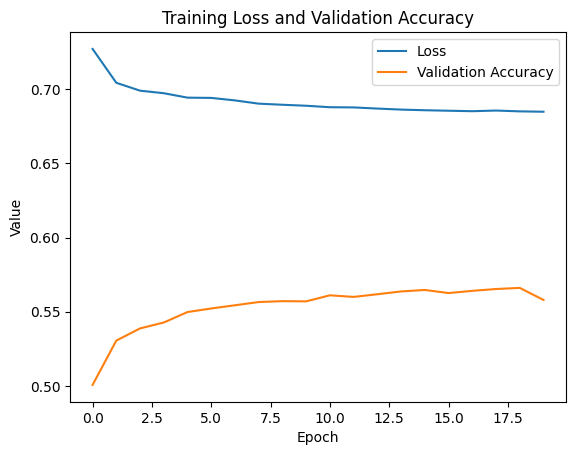

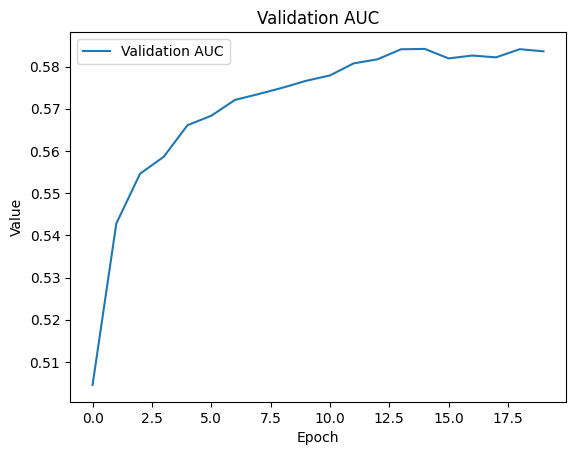

In [ ]:
import matplotlib.pyplot as plt

# Plot loss and accuracy values over epochs
plt.plot(loss_values, label="Loss")
plt.plot(acc_values, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()
plt.title("Training Loss and Validation Accuracy")
plt.show()

plt.plot(val_auc_values, label="Validation AUC")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()
plt.title("Validation AUC")
plt.show()

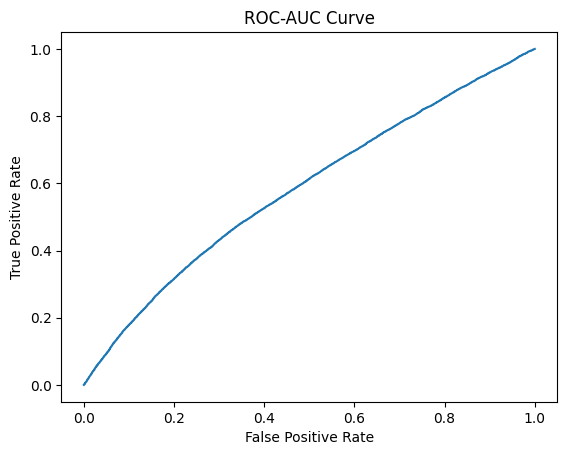

In [ ]:
from sklearn.metrics import roc_curve

# Plot ROC-AUC curve
fpr, tpr, thresholds = roc_curve(val_labels, val_preds)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.show()

In [ ]:
# Save the fine-tuned model
torch.save(model, '/content/drive/MyDrive/GSoC/task_1/model/model_pytorch_mod6.pt')

In [ ]:
pip install torchviz graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4147 sha256=494dd22b12b134fbf23b23186e8738135b266d7a5c7e45591dd11cbeee85cbf1
  Stored in directory: /root/.cache/pip/wheels/29/65/6e/db2515eb1dc760fecd36b40d54df65c1e18534013f1c037e2e
Successfully built torchviz


In [ ]:
import torchviz
from torch.autograd import Variable

# Set up the directory where you want to save the visualization
save_dir = "/content/drive/MyDrive/GSoC/task_1/model/"

# Make sure the directory exists, if not, create it
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Create a dummy input tensor with the same dimensions as the model's input
dummy_input = Variable(torch.randn(1, 2, 32, 32).to(device))

# Perform a forward pass on the model using the dummy input
output = model(dummy_input)

# Visualize the model and save it
torchviz.make_dot(output, params=dict(model.named_parameters())).render(os.path.join(save_dir, "task1_pytorch_mod6"), format="png")


'/content/drive/MyDrive/GSoC/task_1/model/task1_pytorch_mod6.png'